In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Preprocessing data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ck/tphcm_2008_2018.csv')

In [ ]:
data

,request_type,request_query,date,maxtempC,mintempC,avgtempC,uvIndex,windspeedKmph,winddirDegree,weatherDes_value,precipMM,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,Weather
0,City,"Ho Chi Minh City, Vietnam",11/8/2008,32,24,29,6,5,105,Light rain shower,5.2,86,10,1008,61,32,24,27,9,32,yes
1,NaN,NaN,11/9/2008,31,25,29,6,4,169,Moderate or heavy rain shower,22.1,89,9,1009,46,33,25,27,6,33,yes
2,NaN,NaN,11/10/2008,32,24,28,6,5,59,Torrential rain shower,26.5,86,8,1010,47,31,24,27,8,31,yes
3,NaN,NaN,11/11/2008,31,22,28,6,6,121,Moderate or heavy rain shower,6.1,86,8,1010,28,30,23,26,10,30,yes
4,NaN,NaN,11/12/2008,32,21,27,7,7,126,Sunny,0.4,81,10,1010,11,29,22,25,11,29,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,NaN,NaN,11/9/2018,33,25,30,7,12,95,Partly cloudy,0.0,71,10,1009,18,32,22,28,18,32,no
3654,NaN,NaN,11/10/2018,34,26,31,8,9,88,Sunny,0.0,68,10,1010,11,32,22,29,12,32,no
3655,NaN,NaN,11/11/2018,34,25,30,8,9,91,Partly cloudy,0.0,68,10,1010,20,32,22,29,12,32,no
3656,NaN,NaN,11/12/2018,33,26,30,6,8,78,Moderate or heavy rain shower,7.0,74,9,1009,23,33,23,28,11,33,yes


In [ ]:
data = data.iloc[:, 3:]
data = data.drop(['weatherDes_value'], axis=1)
data['Weather'] = data['Weather'].replace('yes',0)
data['Weather'] = data['Weather'].replace('maybe',1)
data['Weather'] = data['Weather'].replace('no',2)

In [ ]:
data

,maxtempC,mintempC,avgtempC,uvIndex,windspeedKmph,winddirDegree,precipMM,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,Weather
0,32,24,29,6,5,105,5.2,86,10,1008,61,32,24,27,9,32,0
1,31,25,29,6,4,169,22.1,89,9,1009,46,33,25,27,6,33,0
2,32,24,28,6,5,59,26.5,86,8,1010,47,31,24,27,8,31,0
3,31,22,28,6,6,121,6.1,86,8,1010,28,30,23,26,10,30,0
4,32,21,27,7,7,126,0.4,81,10,1010,11,29,22,25,11,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,33,25,30,7,12,95,0.0,71,10,1009,18,32,22,28,18,32,2
3654,34,26,31,8,9,88,0.0,68,10,1010,11,32,22,29,12,32,2
3655,34,25,30,8,9,91,0.0,68,10,1010,20,32,22,29,12,32,2
3656,33,26,30,6,8,78,7.0,74,9,1009,23,33,23,28,11,33,0


In [ ]:
#Kiểm tra xem có giá trị null trong data hay không
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   maxtempC       3658 non-null   int64  
 1   mintempC       3658 non-null   int64  
 2   avgtempC       3658 non-null   int64  
 3   uvIndex        3658 non-null   int64  
 4   windspeedKmph  3658 non-null   int64  
 5   winddirDegree  3658 non-null   int64  
 6   precipMM       3658 non-null   float64
 7   humidity       3658 non-null   int64  
 8   visibility     3658 non-null   int64  
 9   pressure       3658 non-null   int64  
 10  cloudcover     3658 non-null   int64  
 11  HeatIndexC     3658 non-null   int64  
 12  DewPointC      3658 non-null   int64  
 13  WindChillC     3658 non-null   int64  
 14  WindGustKmph   3658 non-null   int64  
 15  FeelsLikeC     3658 non-null   int64  
 16  Weather        3658 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 486.0 KB


In [ ]:
#Loại bỏ outlier, tránh bị overfit
from scipy import stats
z = np.abs(stats.zscore(data._get_numeric_data()))
print(z)
data = data[(z < 3).all(axis=1)]
print(data.shape)

[[0.35964016 0.62685923 0.33454708 ... 0.78838073 0.00729602 0.79680719]
 [0.7614617  0.00442409 0.33454708 ... 1.4274478  0.42316897 0.79680719]
 [0.35964016 0.62685923 0.8767594  ... 1.00140308 0.43776101 0.79680719]
 ...
 [0.44400291 0.00442409 0.20766524 ... 0.14931365 0.00729602 1.46793306]
 [0.04218137 0.61801105 0.20766524 ... 0.36233601 0.42316897 0.79680719]
 [0.04218137 0.00442409 0.20766524 ... 0.57535837 0.42316897 0.33556293]]
(3459, 17)


In [ ]:
y = data['Weather'].values
data = data.drop(['Weather'], axis=1)
label = np.unique(y)
label

array([0, 1, 2])

In [ ]:
#Chuẩn hoá dữ liệu
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
data

,maxtempC,mintempC,avgtempC,uvIndex,windspeedKmph,winddirDegree,precipMM,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,0.428571,0.375,0.4,0.333333,0.1875,0.289720,0.132653,0.803922,1.00,0.416667,0.701149,0.500000,0.7,0.333333,0.260870,0.500000
1,0.357143,0.500,0.4,0.333333,0.1250,0.489097,0.563776,0.862745,0.75,0.500000,0.528736,0.583333,0.8,0.333333,0.130435,0.583333
2,0.428571,0.375,0.3,0.333333,0.1875,0.146417,0.676020,0.803922,0.50,0.583333,0.540230,0.416667,0.7,0.333333,0.217391,0.416667
3,0.357143,0.125,0.3,0.333333,0.2500,0.339564,0.155612,0.803922,0.50,0.583333,0.321839,0.333333,0.6,0.222222,0.304348,0.333333
4,0.428571,0.000,0.2,0.666667,0.3125,0.355140,0.010204,0.705882,1.00,0.583333,0.126437,0.250000,0.5,0.111111,0.347826,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,0.500000,0.500,0.5,0.666667,0.6250,0.258567,0.000000,0.509804,1.00,0.500000,0.206897,0.500000,0.5,0.444444,0.652174,0.500000
3654,0.571429,0.625,0.6,1.000000,0.4375,0.236760,0.000000,0.450980,1.00,0.583333,0.126437,0.500000,0.5,0.555556,0.391304,0.500000
3655,0.571429,0.500,0.5,1.000000,0.4375,0.246106,0.000000,0.450980,1.00,0.583333,0.229885,0.500000,0.5,0.555556,0.391304,0.500000
3656,0.500000,0.625,0.5,0.333333,0.3750,0.205607,0.178571,0.568627,0.75,0.500000,0.264368,0.583333,0.6,0.444444,0.347826,0.583333


{0: 1993, 1: 483, 2: 983}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


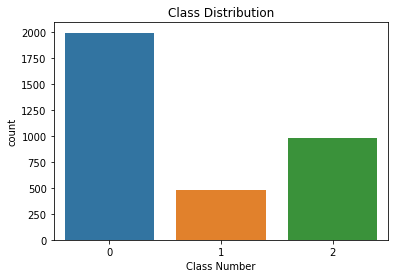

In [ ]:
import seaborn as sns

ser = {}
for i in label:
  ser[i] = sum(y==i)

sns.countplot(y)
plt.title("Class Distribution")
plt.xlabel("Class Number")
print(ser)

In [ ]:
#Lựa chọn những đặc trưng tốt nhất để dự đoán
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
selector.fit(data, y)
X = selector.transform(data)
print(data.columns[selector.get_support(indices=True)])

Index(['maxtempC', 'uvIndex', 'winddirDegree', 'precipMM', 'humidity',
       'visibility', 'pressure', 'cloudcover', 'DewPointC', 'FeelsLikeC'],
      dtype='object')


In [ ]:
def perf_measure(y_true, y_pred, cla):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_true[i]==y_pred[i]==cla:
           TP += 1
        if y_pred[i]==cla and y_true[i] != cla:
           FP += 1
        if y_true[i]==cla and y_pred[i] != cla:
           FN += 1
    return(TP, FP, FN)

def evaluate_model(TP,FP,FN):
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f_1 = (2*precision*recall)/(precision+recall)
    return precision, recall, f_1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

t0=time.time()
clf_logreg = LogisticRegression(solver='lbfgs')
clf_logreg.fit(X_train,y_train)
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8651252408477842
Time taken : 0.13939213752746582


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


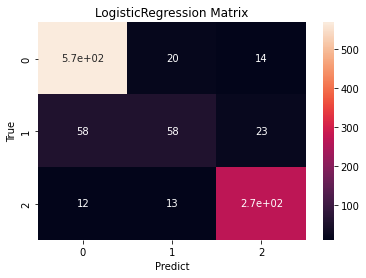

In [ ]:
datas = {'y_true' : y_test, 'y_predict': y_pred}
df = pd.DataFrame(datas, columns = ['y_true', 'y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], 
                               rownames = ['True'], colnames = ['Predict'])

plt.title('LogisticRegression Matrix')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
TP_0, FP_0, FN_0 = perf_measure(y_test, y_pred, 0)
print(TP_0, FP_0, FN_0)
precision_0, recall_0, f1_0 = evaluate_model(TP_0,FP_0,FN_0)
print(precision_0, recall_0, f1_0)

TP_1, FP_1, FN_1 = perf_measure(y_test, y_pred, 1)
print(TP_1, FP_1, FN_1)
precision_1, recall_1, f1_1 = evaluate_model(TP_1,FP_1,FN_1)
print(precision_1, recall_1, f1_1)


TP_2, FP_2, FN_2 = perf_measure(y_test, y_pred, 2)
print(TP_2, FP_2, FN_2)
precision_2, recall_2, f1_2 = evaluate_model(TP_2, FP_2, FN_2)
print(precision_2, recall_2, f1_2)

569 70 34
0.8904538341158059 0.9436152570480929 0.9162640901771336
58 33 81
0.6373626373626373 0.4172661870503597 0.5043478260869565
271 37 25
0.8798701298701299 0.9155405405405406 0.8973509933774835


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)
auc_score = auc(fpr, tpr)
print(auc_score)

0.9492628578713485


In [ ]:
models.loc['logistic regression'] = (precision_0, recall_0, f1_0, precision_1, recall_1, f1_1, precision_2, recall_2, f1_2, auc_score)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

t0=time.time()
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8863198458574181
Time taken : 0.26491618156433105


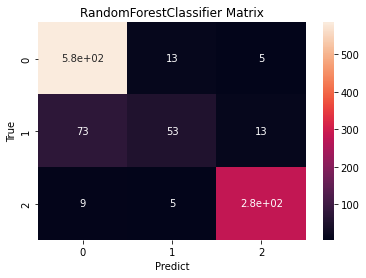

In [ ]:
datas = {'y_true' : y_test, 'y_predict': y_pred}
df = pd.DataFrame(datas, columns = ['y_true', 'y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], 
                               rownames = ['True'], colnames = ['Predict'])

plt.title('RandomForestClassifier Matrix')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
TP_0, FP_0, FN_0 = perf_measure(y_test, y_pred, 0)
print(TP_0, FP_0, FN_0)
precision_0, recall_0, f1_0 = evaluate_model(TP_0,FP_0,FN_0)
print(precision_0, recall_0, f1_0)

TP_1, FP_1, FN_1 = perf_measure(y_test, y_pred, 1)
print(TP_1, FP_1, FN_1)
precision_1, recall_1, f1_1 = evaluate_model(TP_1,FP_1,FN_1)
print(precision_1, recall_1, f1_1)


TP_2, FP_2, FN_2 = perf_measure(y_test, y_pred, 2)
print(TP_2, FP_2, FN_2)
precision_2, recall_2, f1_2 = evaluate_model(TP_2, FP_2, FN_2)
print(precision_2, recall_2, f1_2)

585 82 18
0.8770614692653673 0.9701492537313433 0.9212598425196852
53 18 86
0.7464788732394366 0.381294964028777 0.5047619047619049
282 18 14
0.94 0.9527027027027027 0.9463087248322148


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)
auc_score = auc(fpr, tpr)
print(auc_score)

0.9703595104538502


In [ ]:
models.loc['random forest'] = (precision_0, recall_0, f1_0, precision_1, recall_1, f1_1, precision_2, recall_2, f1_2, auc_score)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

t0=time.time()
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8689788053949904
Time taken : 0.01394510269165039


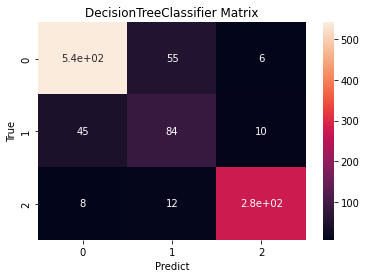

In [ ]:
datas = {'y_true' : y_test, 'y_predict': y_pred}
df = pd.DataFrame(datas, columns = ['y_true', 'y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], 
                               rownames = ['True'], colnames = ['Predict'])

plt.title('DecisionTreeClassifier Matrix')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

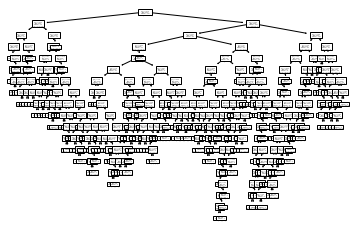

In [ ]:
from sklearn import tree

tree.plot_tree(clf_dt)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ck/tree.pdf')
plt.show()

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf_dt,
                           filled=True, 
                           rounded=True,
                           class_names=['yes', 
                                        'maybe',
                                        'no'],
                           feature_names=data.columns[selector.get_support(indices=True)],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ck/decision-tree.png') 

True

In [ ]:
TP_0, FP_0, FN_0 = perf_measure(y_test, y_pred, 0)
print(TP_0, FP_0, FN_0)
precision_0, recall_0, f1_0 = evaluate_model(TP_0,FP_0,FN_0)
print(precision_0, recall_0, f1_0)

TP_1, FP_1, FN_1 = perf_measure(y_test, y_pred, 1)
print(TP_1, FP_1, FN_1)
precision_1, recall_1, f1_1 = evaluate_model(TP_1,FP_1,FN_1)
print(precision_1, recall_1, f1_1)


TP_2, FP_2, FN_2 = perf_measure(y_test, y_pred, 2)
print(TP_2, FP_2, FN_2)
precision_2, recall_2, f1_2 = evaluate_model(TP_2, FP_2, FN_2)
print(precision_2, recall_2, f1_2)

542 53 61
0.9109243697478991 0.8988391376451078 0.9048414023372288
84 67 55
0.5562913907284768 0.60431654676259 0.5793103448275863
276 16 20
0.9452054794520548 0.9324324324324325 0.9387755102040816


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)
auc_score = auc(fpr, tpr)
print(auc_score)

0.9689389524295184


In [ ]:
models.loc['decision tree'] = (precision_0, recall_0, f1_0, precision_1, recall_1, f1_1, precision_2, recall_2, f1_2, auc_score)

#Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

t0=time.time()
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8728323699421965
Time taken : 0.09625554084777832


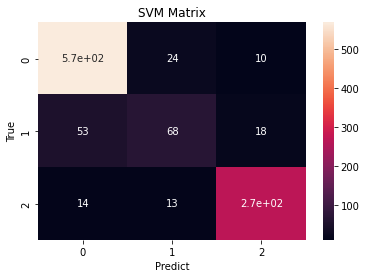

In [ ]:
datas = {'y_true' : y_test, 'y_predict': y_pred}
df = pd.DataFrame(datas, columns = ['y_true', 'y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], 
                               rownames = ['True'], colnames = ['Predict'])

plt.title('SVM Matrix')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
TP_0, FP_0, FN_0 = perf_measure(y_test, y_pred, 0)
print(TP_0, FP_0, FN_0)
precision_0, recall_0, f1_0 = evaluate_model(TP_0,FP_0,FN_0)
print(precision_0, recall_0, f1_0)

TP_1, FP_1, FN_1 = perf_measure(y_test, y_pred, 1)
print(TP_1, FP_1, FN_1)
precision_1, recall_1, f1_1 = evaluate_model(TP_1,FP_1,FN_1)
print(precision_1, recall_1, f1_1)


TP_2, FP_2, FN_2 = perf_measure(y_test, y_pred, 2)
print(TP_2, FP_2, FN_2)
precision_2, recall_2, f1_2 = evaluate_model(TP_2, FP_2, FN_2)
print(precision_2, recall_2, f1_2)

569 67 34
0.8946540880503144 0.9436152570480929 0.9184826472962065
68 37 71
0.6476190476190476 0.4892086330935252 0.5573770491803279
269 28 27
0.9057239057239057 0.9087837837837838 0.9072512647554807


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)
auc_score = auc(fpr, tpr)
print(auc_score)

0.9509998543017412


In [ ]:
models.loc['svm'] = (precision_0, recall_0, f1_0, precision_1, recall_1, f1_1, precision_2, recall_2, f1_2, auc_score)

#Evaluate models

In [ ]:
models = pd.DataFrame(columns = ['precision_0', 'recall_0', 'f1_0', 'precision_1', 'recall_1', 'f1_1', 'precision_2', 'recall_2', 'f1_2', 'auc'], index = ['logistic regression', 'random forest', 'decision tree', 'svm'])

In [ ]:
models

,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1,precision_2,recall_2,f1_2,auc
logistic regression,0.890454,0.943615,0.916264,0.637363,0.417266,0.504348,0.87987,0.915541,0.897351,0.949263
random forest,0.877061,0.970149,0.92126,0.746479,0.381295,0.504762,0.94,0.952703,0.946309,0.97036
decision tree,0.910924,0.898839,0.904841,0.556291,0.604317,0.57931,0.945205,0.932432,0.938776,0.968939
svm,0.894654,0.943615,0.918483,0.647619,0.489209,0.557377,0.905724,0.908784,0.907251,0.951


#Predict

In [ ]:
predict_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/ck/tphcm_next_week.csv')

In [ ]:
date_predict = predict_data['date']

In [ ]:
predict_data = predict_data.drop(['date'], axis=1)

In [ ]:
predict = clf_svc.predict(predict_data[data.columns[selector.get_support(indices=True)]].values)

In [ ]:
#0 là mưa
#1 là có thể có mưa
#2 là không mưa
for i in range(len(date_predict)):
  print('{}:{}'.format(date_predict[i], predict[i]))

11/17/2021:0
11/18/2021:0
11/19/2021:0
11/20/2021:0
11/21/2021:0
11/22/2021:0
11/23/2021:0
11/24/2021:0


In [ ]:
data.columns[selector.get_support(indices=True)]

Index(['maxtempC', 'uvIndex', 'winddirDegree', 'precipMM', 'humidity',
       'visibility', 'pressure', 'cloudcover', 'DewPointC', 'FeelsLikeC'],
      dtype='object')